In [16]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [3]:
df = pd.read_csv("NFLX.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5417,2023-11-29,479.000000,480.989990,474.489990,477.190002,477.190002,2855500
5418,2023-11-30,475.309998,478.589996,470.420013,473.970001,473.970001,4287300
5419,2023-12-01,473.170013,475.230011,464.600006,465.739990,465.739990,4338100
5420,2023-12-04,460.989990,461.200012,451.200012,453.899994,453.899994,5157700
5421,2023-12-05,450.700012,456.390015,449.579987,455.149994,455.149994,3261100


In [6]:
df1=df.reset_index()['Close'];df1

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
5417    477.190002
5418    473.970001
5419    465.739990
5420    453.899994
5421    455.149994
Name: Close, Length: 5422, dtype: float64

In [7]:
df1

0         1.196429
1         1.210000
2         1.157143
3         1.103571
4         1.071429
           ...    
5417    477.190002
5418    473.970001
5419    465.739990
5420    453.899994
5421    455.149994
Name: Close, Length: 5422, dtype: float64

In [8]:
import seaborn as sns

In [13]:
import warnings

warnings.filterwarnings("ignore")

<Axes: xlabel='Close', ylabel='Density'>

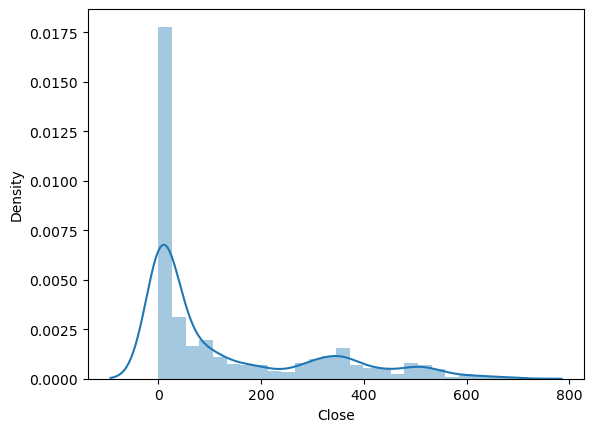

In [14]:
sns.distplot(df1)

In [15]:
df1.shape

(5422,)

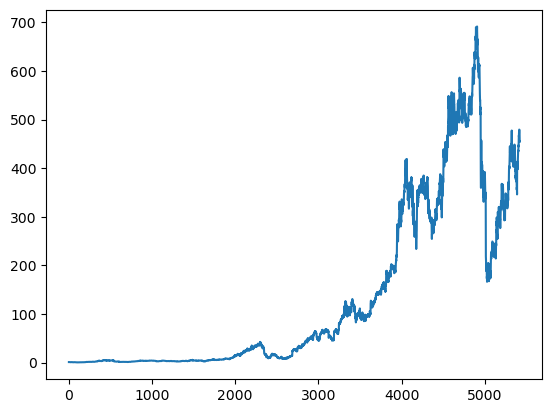

In [17]:
plt.plot(df1);plt.show()

In [20]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [21]:
df1

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       ...,
       [0.67316012],
       [0.6560334 ],
       [0.65784154]])

In [22]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
training_size,test_size

(3795, 1627)

In [24]:
train_data[:10]

array([[0.00119131],
       [0.00121094],
       [0.00113448],
       [0.00105699],
       [0.00101049],
       [0.00101773],
       [0.00109315],
       [0.00107765],
       [0.00112002],
       [0.00117064]])

In [27]:
import numpy

In [25]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(3694, 100)
(3694,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(1526, 100)
(1526,)


(None, None)

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

58/58 [==============================] - 32s 301ms/step - loss: 5.6635e-04 - val_loss: 0.0026
Epoch 2/100
58/58 [==============================] - 14s 244ms/step - loss: 3.0733e-05 - val_loss: 0.0037
Epoch 3/100
58/58 [==============================] - 15s 253ms/step - loss: 3.1398e-05 - val_loss: 0.0025
Epoch 4/100
58/58 [==============================] - 14s 245ms/step - loss: 2.9485e-05 - val_loss: 0.0032
Epoch 5/100
58/58 [==============================] - 14s 244ms/step - loss: 3.0486e-05 - val_loss: 0.0033
Epoch 6/100
58/58 [==============================] - 14s 243ms/step - loss: 3.2172e-05 - val_loss: 0.0022
Epoch 7/100
58/58 [==============================] - 15s 252ms/step - loss: 2.6956e-05 - val_loss: 0.0027
Epoch 8/100
58/58 [==============================] - 14s 240ms/step - loss: 2.6833e-05 - val_loss: 0.0040
Epoch 9/100
58/58 [==============================] - 14s 248ms/step - loss: 2.4052e-05 - val_loss: 0.0022
Epoch 10/100
58/58 [=========================

58/58 [==============================] - 14s 246ms/step - loss: 5.9750e-06 - val_loss: 6.2520e-04
Epoch 75/100
58/58 [==============================] - 14s 247ms/step - loss: 6.2260e-06 - val_loss: 3.0363e-04
Epoch 76/100
58/58 [==============================] - 14s 248ms/step - loss: 6.4460e-06 - val_loss: 3.1331e-04
Epoch 77/100
58/58 [==============================] - 14s 245ms/step - loss: 6.1149e-06 - val_loss: 6.9326e-04
Epoch 78/100
58/58 [==============================] - 14s 244ms/step - loss: 5.3291e-06 - val_loss: 6.2440e-04
Epoch 79/100
58/58 [==============================] - 14s 245ms/step - loss: 5.7401e-06 - val_loss: 5.5462e-04
Epoch 80/100
58/58 [==============================] - 14s 245ms/step - loss: 5.3711e-06 - val_loss: 4.9793e-04
Epoch 81/100
58/58 [==============================] - 15s 251ms/step - loss: 4.7989e-06 - val_loss: 3.6966e-04
Epoch 82/100
58/58 [==============================] - 14s 250ms/step - loss: 6.4128e-06 - val_loss: 6.9376e-04
Epoch 83/100
5

In [35]:
tf.__version__

'2.15.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

48/48 [==============================] - 3s 66ms/step


In [37]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

49.77084107581882

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


394.3074228927035

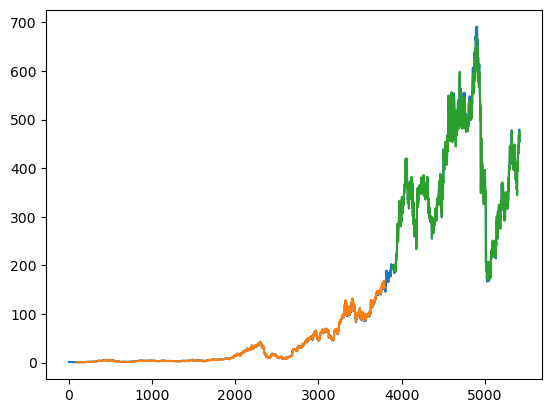

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [41]:
len(test_data)

1627

In [42]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 1286)

In [43]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [44]:
temp_input[:5]

[0.45203151731467617,
 0.43316896183733444,
 0.41148572844956705,
 0.4128888500226621,
 0.43598968169666896]

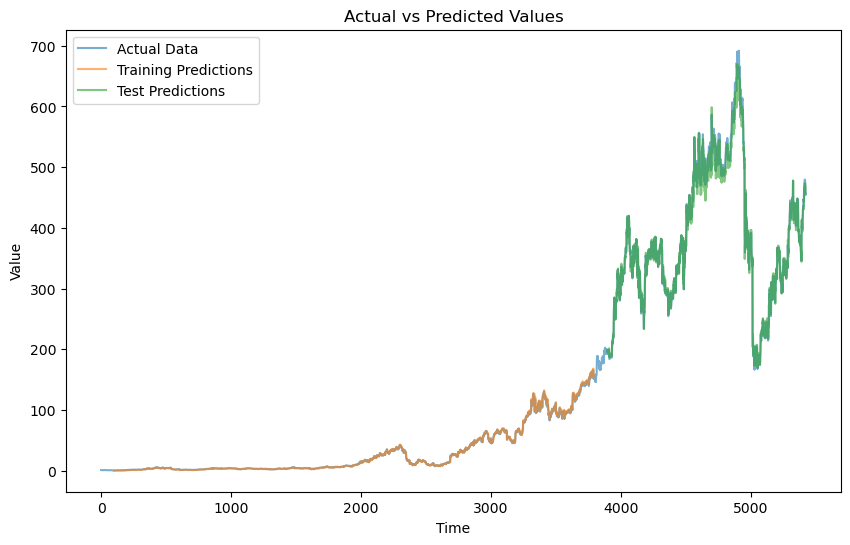

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df1 contains your original dataset and train_predict, test_predict are your predicted values
# ...

# Set the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plot baseline and predictions with opacity
plt.plot(scaler.inverse_transform(df1), label='Actual Data', alpha=0.6)
plt.plot(trainPredictPlot, label='Training Predictions', alpha=0.6)
plt.plot(testPredictPlot, label='Test Predictions', alpha=0.6)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()
